In [2]:
##### Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# # Combine the data into a single dataset
combined_clinical_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

# Display the data table for preview
combined_clinical_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVolume = combined_clinical_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']\
                .reset_index()

# Convert to DataFrame
# Is reseting index will help with converting to dataframe?

# meanTumorVolume_df = meanTumorVolume.to_frame()
# meanTumorVolume_df = pd.DataFrame({
#                     "Tumor Volume (mm3)": meanTumorVolume,
#                     "Drug": combined_clinical_data["Drug"]
# })

# Preview DataFrame
meanTumorVolume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumorVolumes = combined_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'].reset_index()
# sem = [s.sem() for s in meanTumorVolume]
se_capomulin = se_tumorVolumes[se_tumorVolumes["Drug"]=="Capomulin"]["Tumor Volume (mm3)"]
se_infubinol = se_tumorVolumes[se_tumorVolumes["Drug"]=="Infubinol"]["Tumor Volume (mm3)"]
se_ketapril = se_tumorVolumes[se_tumorVolumes["Drug"]=="Ketapril"]["Tumor Volume (mm3)"]
se_placebo = se_tumorVolumes[se_tumorVolumes["Drug"]=="Placebo"]["Tumor Volume (mm3)"]

# only_billys = df.loc[df["first_name"] == "Billy", :]
# Convert to DataFrame

# Preview DataFrame
se_tumorVolumes.head(5)
# se_Ceftamin



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
# elongated = meanTumorVolume.set_index('Drug').T

# elongated = pd.pivot_table(meanTumorVolume, values="Drug", \
#                            index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

formatted_meanTumVol = meanTumorVolume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')\
            .reset_index()

# Preview that Reformatting worked
formatted_meanTumVol.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


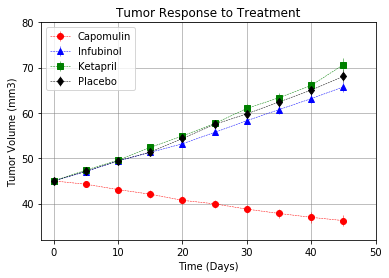

In [42]:
# Generate the Plot (with Error Bars)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
# data = formatted_meanTumVol["Capomulin"]
# data
time = formatted_meanTumVol["Timepoint"]
time
# Set the upper and lower limits of y axis
plt.ylim(32, 80)

# Set the upper and lower limits of x axis
plt.xlim(-2,50)

capomulin = plt.errorbar(time, formatted_meanTumVol["Capomulin"], yerr=se_capomulin,\
                         color="Red", linewidth=0.5, linestyle="dashed", label="Capomulin", marker="o")

infubinol = plt.errorbar(time, formatted_meanTumVol["Infubinol"], yerr=se_infubinol,\
                         color="Blue", linewidth=0.5, linestyle="dashed", label="Infubinol", marker="^")

ketapril = plt.errorbar(time, formatted_meanTumVol["Ketapril"], yerr=se_ketapril,\
                        color="Green", linewidth=0.5, linestyle="dashed", label="Ketapril", marker="s")

placebo = plt.errorbar(time, formatted_meanTumVol["Placebo"], yerr=se_placebo,\
                       color="Black", linewidth=0.5, linestyle="dashed", label="Placebo", marker="d")
# ceftamin.show()

# Save the Figure
# ceftamin.show()

plt.legend(handles=[capomulin, infubinol, ketapril, placebo])
# Customize the grid
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()



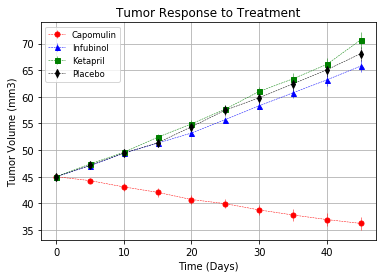

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [55]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_MetSites = combined_clinical_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']\
                 .reset_index()


# Convert to DataFrame



# Preview DataFrame
meanMetSite.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [58]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_MetSites = combined_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']\
            .reset_index()

se_capomulinResponse = se_MetSites[se_MetSites["Drug"]=="Capomulin"]["Metastatic Sites"]
se_infubinolResponse = se_MetSites[se_MetSites["Drug"]=="Infubinol"]["Metastatic Sites"]
se_ketaprilResponse = se_MetSites[se_MetSites["Drug"]=="Ketapril"]["Metastatic Sites"]
se_placeboResponse = se_MetSites[se_MetSites["Drug"]=="Placebo"]["Metastatic Sites"]

# Convert to DataFrame

# Preview DataFrame
se_MetSites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [57]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mean_MetSites = mean_MetSites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')\
            .reset_index()

# Preview that Reformatting worked
formatted_mean_MetSites.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


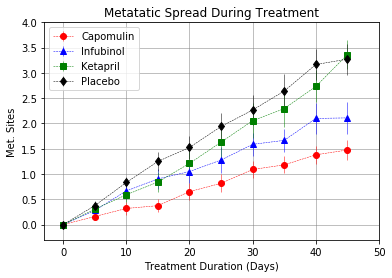

In [63]:
# Generate the Plot (with Error Bars)
plt.title("Metatatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# data = formatted_meanTumVol["Capomulin"]
# data
time = formatted_mean_MetSites["Timepoint"]
time
# Set the upper and lower limits of y axis
plt.ylim(-0.3, 4)

# Set the upper and lower limits of x axis
plt.xlim(-3,50)

capomulinResponse = plt.errorbar(time, formatted_mean_MetSites["Capomulin"], yerr=se_capomulinResponse,\
                         color="Red", linewidth=0.5, linestyle="dashed", label="Capomulin", marker="o")

infubinolResponse = plt.errorbar(time, formatted_mean_MetSites["Infubinol"], yerr=se_infubinolResponse,\
                         color="Blue", linewidth=0.5, linestyle="dashed", label="Infubinol", marker="^")

ketaprilResponse = plt.errorbar(time, formatted_mean_MetSites["Ketapril"], yerr=se_ketaprilResponse,\
                        color="Green", linewidth=0.5, linestyle="dashed", label="Ketapril", marker="s")

placeboResponse = plt.errorbar(time, formatted_mean_MetSites["Placebo"], yerr=se_placeboResponse,\
                       color="Black", linewidth=0.5, linestyle="dashed", label="Placebo", marker="d")



plt.legend(handles=[capomulinResponse, infubinolResponse, ketaprilResponse, placeboResponse])
# Customize the grid
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()
# Save the Figure

# Show the Figure


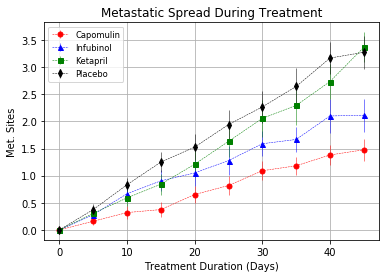

## Survival Rates

In [66]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceCount = combined_clinical_data.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame
# create a new column and then create a new data frame with only columns that you neeed, like you did 
# in the previous homework

# Preview DataFrame
miceCount.head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

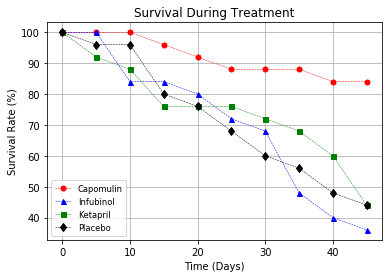

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

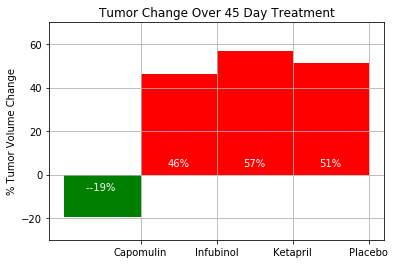